# Long short term Memory(LSTM) Technique over Smart Meters dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import os

<ipython-input-1-011295c32d88>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
energy = pd.read_csv('energy.csv')
len(energy)

3536007

In [3]:
housecount = energy.groupby('day')[['LCLid']].nunique()
housecount.head(10)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
2011-11-28,55
2011-11-29,63
2011-11-30,76
2011-12-01,92


In [4]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()
energy

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41
...,...,...,...
824,2014-02-24,52867.660004,4994
825,2014-02-25,52330.109999,4995
826,2014-02-26,51804.199995,4993
827,2014-02-27,52580.878999,4990


In [5]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [6]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [7]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [8]:
energy.head()

,day,energy_sum,LCLid,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [9]:
weather = pd.read_csv('weather_daily_darksky.csv')
weather.head(10)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,11-11-2011 23:00,123,fog,9.40,11-11-2011 07:00,0.79,3.88,1016.08,11-11-2011 07:00,...,10.87,11-11-2011 07:12,11-11-2011 19:00,11-11-2011 11:00,Foggy until afternoon.,11-11-2011 19:00,6.48,11-11-2011 23:00,11-11-2011 19:00,0.52
1,8.59,11-12-2011 14:00,198,partly-cloudy-day,4.49,11-12-2011 01:00,0.56,3.94,1007.71,11-12-2011 02:00,...,8.59,11-12-2011 07:57,11-12-2011 14:00,11-12-2011 12:00,Partly cloudy throughout the day.,12-12-2011 07:00,0.11,11-12-2011 20:00,12-12-2011 08:00,0.53
2,10.33,27-12-2011 02:00,225,partly-cloudy-day,5.47,27-12-2011 23:00,0.85,3.54,1032.76,27-12-2011 22:00,...,10.33,27-12-2011 08:07,27-12-2011 14:00,27-12-2011 00:00,Mostly cloudy throughout the day.,27-12-2011 23:00,5.59,27-12-2011 02:00,28-12-2011 00:00,0.10
3,8.07,02-12-2011 23:00,232,wind,3.69,02-12-2011 07:00,0.32,3.00,1012.12,02-12-2011 07:00,...,7.36,02-12-2011 07:46,02-12-2011 12:00,02-12-2011 10:00,Partly cloudy throughout the day and breezy ov...,02-12-2011 19:00,0.46,02-12-2011 12:00,02-12-2011 19:00,0.25
4,8.22,24-12-2011 23:00,252,partly-cloudy-night,2.79,24-12-2011 07:00,0.37,4.46,1028.17,24-12-2011 07:00,...,7.93,24-12-2011 08:06,24-12-2011 15:00,24-12-2011 13:00,Mostly cloudy throughout the day.,24-12-2011 19:00,-0.51,24-12-2011 23:00,24-12-2011 20:00,0.99
5,7.97,15-12-2011 14:00,234,wind,2.41,15-12-2011 00:00,0.42,4.71,996.75,15-12-2011 00:00,...,7.97,15-12-2011 08:00,15-12-2011 14:00,15-12-2011 11:00,Partly cloudy throughout the day and breezy in...,16-12-2011 08:00,1.07,15-12-2011 21:00,16-12-2011 08:00,0.66
6,13.19,19-11-2011 14:00,117,fog,8.12,19-11-2011 23:00,0.26,2.37,1016.80,19-11-2011 08:00,...,13.19,19-11-2011 07:26,19-11-2011 14:00,19-11-2011 10:00,Foggy starting in the evening.,20-11-2011 08:00,5.98,19-11-2011 14:00,20-11-2011 08:00,0.79
7,8.32,16-11-2011 23:00,117,fog,5.58,16-11-2011 07:00,0.81,2.36,1017.40,16-11-2011 04:00,...,8.18,16-11-2011 07:20,16-11-2011 14:00,16-11-2011 11:00,Foggy starting in the evening.,16-11-2011 19:00,2.93,16-11-2011 23:00,16-11-2011 19:00,0.68
8,9.82,12-12-2011 23:00,221,wind,4.10,12-12-2011 07:00,0.38,5.02,1002.47,12-12-2011 08:00,...,8.53,12-12-2011 07:58,12-12-2011 19:00,12-12-2011 11:00,Partly cloudy throughout the day and breezy st...,13-12-2011 08:00,-0.64,12-12-2011 23:00,13-12-2011 08:00,0.56
9,9.71,20-11-2011 14:00,115,fog,6.62,20-11-2011 08:00,0.41,1.24,1018.82,20-11-2011 08:00,...,9.71,20-11-2011 07:27,20-11-2011 14:00,20-11-2011 10:00,Foggy in the morning.,21-11-2011 02:00,4.76,20-11-2011 15:00,21-11-2011 01:00,0.82


In [10]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [11]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [12]:
weather_energy =  energy.merge(weather,on='day')
weather_energy.head()

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08


In [13]:
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays'],format='%Y-%m-%d').dt.date
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [14]:
weather_energy = weather_energy.merge(holiday, left_on = 'day',right_on = 'Bank holidays',how = 'left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

In [15]:
dataset1=weather_energy[['avg_energy']]

In [16]:
weather_energy['holiday_ind']

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: holiday_ind, Length: 800, dtype: int32

In [17]:
dataset2 = weather_energy.drop(['energy_sum', 'LCLid','Type',
       'Bank holidays','day', 'avg_energy'],axis =1)

<AxesSubplot:>

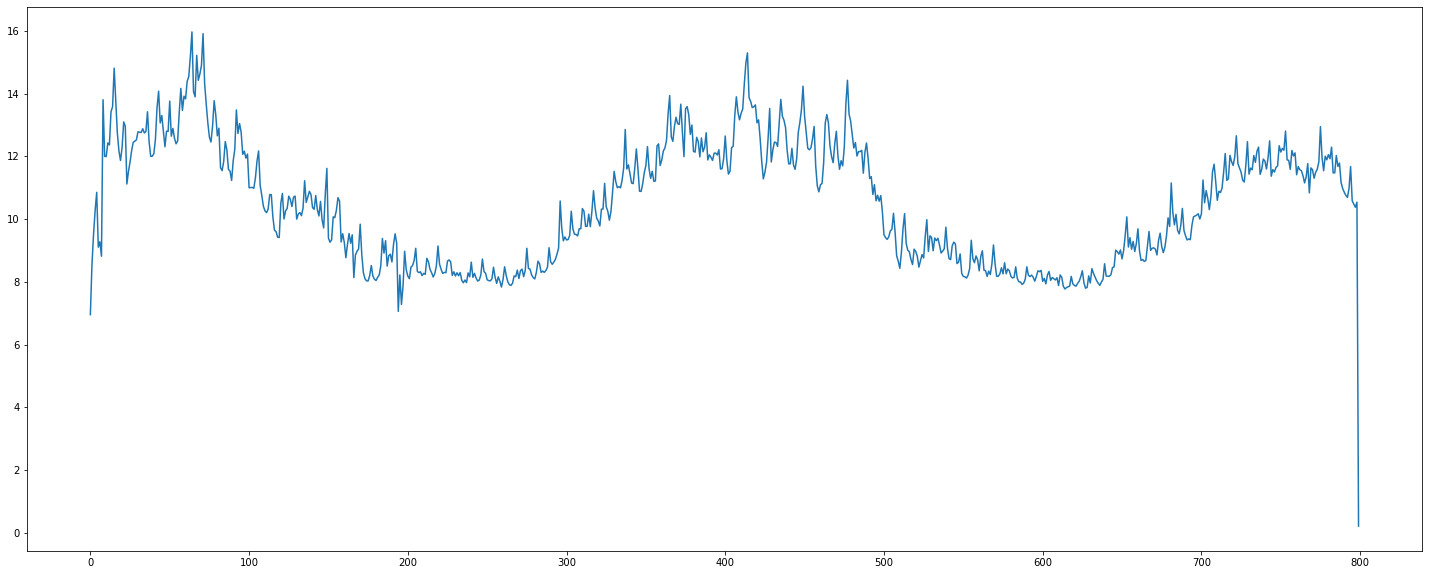

In [18]:
weather_energy['avg_energy'].plot(x=weather_energy['day'],figsize=(25,10))


# Preparing dataset for LSTM

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [21]:
values = dataset1.values
# ensure all data is float
values = values.astype('float32')
# frame as supervised learning
reframed = series_to_supervised(values, 7, 1)

In [22]:
reframed

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,6.952693,8.536480,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513
8,8.536480,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513,13.803264
9,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513,13.803264,11.997481
10,10.267707,10.850805,9.103382,9.274873,8.813513,13.803264,11.997481,11.992352
11,10.850805,9.103382,9.274873,8.813513,13.803264,11.997481,11.992352,12.425220
...,...,...,...,...,...,...,...,...
795,11.164674,10.971368,10.854245,10.754952,10.688234,10.970704,11.673756,10.586235
796,10.971368,10.854245,10.754952,10.688234,10.970704,11.673756,10.586235,10.476499
797,10.854245,10.754952,10.688234,10.970704,11.673756,10.586235,10.476499,10.375365
798,10.754952,10.688234,10.970704,11.673756,10.586235,10.476499,10.375365,10.537251


# Feature Selection for the dataset

In [23]:
dcorr = dataset2.corr()
dcorr

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,holiday_ind
temperatureMax,1.000000,0.070727,0.863306,-0.346295,-0.138677,0.098138,0.986997,0.269981,-0.406919,0.894930,0.990241,0.690925,0.883523,0.895783,0.998041,0.910043,-0.010147,-0.029914
windBearing,0.070727,1.000000,0.099927,-0.080228,0.066417,-0.006300,0.081086,0.255241,0.022017,0.059343,0.083349,-0.083855,0.060391,0.072784,0.065945,0.062602,0.038925,-0.058013
dewPoint,0.863306,0.099927,1.000000,-0.032393,-0.076935,-0.049710,0.868690,0.048479,0.058871,0.897942,0.872747,0.478066,0.895969,0.939741,0.860126,0.941004,-0.017442,-0.037676
cloudCover,-0.346295,-0.080228,-0.032393,1.000000,0.177538,-0.093291,-0.325225,-0.329287,0.489087,-0.148936,-0.321342,-0.260507,-0.116382,-0.070493,-0.348529,-0.111111,-0.061224,-0.053660
windSpeed,-0.138677,0.066417,-0.076935,0.177538,1.000000,-0.308825,-0.169323,0.286008,-0.035645,-0.130055,-0.155871,-0.127803,-0.060061,-0.010423,-0.147497,-0.115246,0.005563,-0.001611
pressure,0.098138,-0.006300,-0.049710,-0.093291,-0.308825,1.000000,0.112203,-0.006675,-0.260783,0.076405,0.099353,0.067579,0.043668,-0.009957,0.109430,0.033000,0.009226,-0.112232
apparentTemperatureHigh,0.986997,0.081086,0.868690,-0.325225,-0.169323,0.112203,1.000000,0.242399,-0.369614,0.896227,0.995485,0.677316,0.877147,0.889595,0.990019,0.912021,-0.010310,-0.039469
visibility,0.269981,0.255241,0.048479,-0.329287,0.286008,-0.006675,0.242399,1.000000,-0.585029,0.169621,0.242674,0.256727,0.181601,0.199286,0.268243,0.160657,0.070642,0.062879
humidity,-0.406919,0.022017,0.058871,0.489087,-0.035645,-0.260783,-0.369614,-0.585029,1.000000,-0.178788,-0.366048,-0.540002,-0.168730,-0.198987,-0.410817,-0.194355,-0.009321,-0.007255
apparentTemperatureLow,0.894930,0.059343,0.897942,-0.148936,-0.130055,0.076405,0.896227,0.169621,-0.178788,1.000000,0.895722,0.594348,0.983166,0.891466,0.894865,0.909815,-0.009698,-0.022182


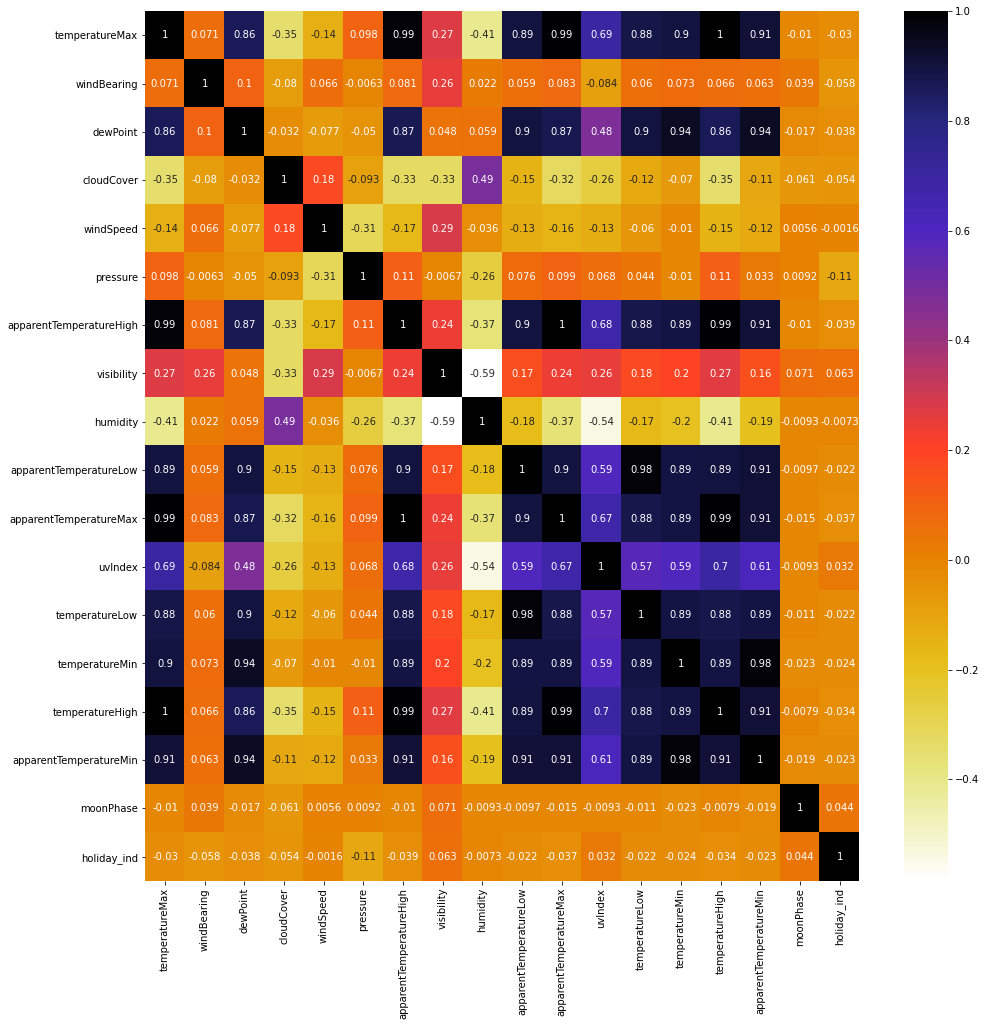

In [24]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(16,16))
sns.heatmap(ax=ax, data = dcorr, annot = True, cmap = plt.cm.CMRmap_r)
plt.savefig('Correlation Matrix LSTM')

In [25]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(dataset2,0.9)
print(len(set(corr_features)))
print(corr_features)

6
{'apparentTemperatureHigh', 'apparentTemperatureMin', 'temperatureMin', 'temperatureLow', 'temperatureHigh', 'apparentTemperatureMax'}


In [27]:
dataset2 = dataset2.drop(corr_features,axis =1)
dataset2

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,apparentTemperatureLow,uvIndex,moonPhase,holiday_ind
0,10.36,229,6.29,0.36,2.04,1027.12,8.06,0.93,6.56,1.0,0.94,0
1,12.93,204,8.56,0.41,4.04,1027.22,10.64,0.89,7.30,1.0,0.97,0
2,13.03,243,7.24,0.48,5.02,1024.47,12.38,0.79,4.69,1.0,0.01,0
3,12.96,237,6.96,0.44,5.75,1025.80,13.07,0.81,11.59,1.0,0.05,0
4,13.54,256,5.76,0.42,5.48,1021.11,13.08,0.72,1.31,1.0,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,14.23,183,6.03,0.50,5.02,1005.19,13.00,0.74,4.78,1.0,0.82,0
796,11.43,202,5.06,0.62,5.69,1000.65,12.09,0.78,1.67,1.0,0.86,0
797,11.29,227,2.74,0.26,3.82,1012.73,13.00,0.73,3.03,2.0,0.90,0
798,10.31,224,3.08,0.32,4.14,1007.02,12.04,0.74,0.82,2.0,0.93,0


In [28]:
reframed = pd.merge(dataset2[7:], reframed, on=reframed.index, how='outer')

In [29]:
reframed = reframed.drop('key_0', axis=1)
reframed

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,apparentTemperatureLow,uvIndex,moonPhase,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,11.87,205,5.26,0.31,4.43,1019.43,13.05,0.78,6.23,1.0,0.19,0,6.952693,8.536480,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513
1,15.26,122,12.19,0.78,2.50,1024.77,4.83,0.93,10.76,1.0,0.55,0,8.536480,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513,13.803264
2,9.82,221,4.10,0.38,5.02,1002.47,12.05,0.84,2.71,1.0,0.56,0,9.499782,10.267707,10.850805,9.103382,9.274873,8.813513,13.803264,11.997481
3,12.08,233,3.62,0.42,7.44,990.27,12.55,0.75,0.22,1.0,0.59,0,10.267707,10.850805,9.103382,9.274873,8.813513,13.803264,11.997481,11.992352
4,5.92,228,1.68,0.36,4.48,994.48,13.20,0.79,1.07,1.0,0.63,0,10.850805,9.103382,9.274873,8.813513,13.803264,11.997481,11.992352,12.425220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,14.23,183,6.03,0.50,5.02,1005.19,13.00,0.74,4.78,1.0,0.82,0,11.164674,10.971368,10.854245,10.754952,10.688234,10.970704,11.673756,10.586235
789,11.43,202,5.06,0.62,5.69,1000.65,12.09,0.78,1.67,1.0,0.86,0,10.971368,10.854245,10.754952,10.688234,10.970704,11.673756,10.586235,10.476499
790,11.29,227,2.74,0.26,3.82,1012.73,13.00,0.73,3.03,2.0,0.90,0,10.854245,10.754952,10.688234,10.970704,11.673756,10.586235,10.476499,10.375365
791,10.31,224,3.08,0.32,4.14,1007.02,12.04,0.74,0.82,2.0,0.93,0,10.754952,10.688234,10.970704,11.673756,10.586235,10.476499,10.375365,10.537251


# Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [31]:
len(reframed)

793

# Train-Test Split

In [32]:
train = reframed[:(len(reframed)-30), :]
test = reframed[(len(reframed)-30):len(reframed), :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [33]:
 train[:, :-1]

array([[0.36752927, 0.57103064, 0.51151894, ..., 0.42591967, 0.2297456 ,
        0.24899796],
       [0.4719655 , 0.33983287, 0.78211636, ..., 0.2297456 , 0.24899796,
        0.19720349],
       [0.30437461, 0.61559889, 0.46622413, ..., 0.24899796, 0.19720349,
        0.75737674],
       ...,
       [0.30961183, 0.39832869, 0.53299492, ..., 0.48534149, 0.45960469,
        0.48130849],
       [0.2905114 , 0.56545961, 0.44474815, ..., 0.45960469, 0.48130849,
        0.52883775],
       [0.26186075, 0.58774373, 0.40726279, ..., 0.48130849, 0.52883775,
        0.42402774]])

In [34]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(763, 1, 19) (763,) (30, 1, 19) (30,)


# Training the Model

Epoch 1/100
39/39 - 0s - loss: 0.2736
Epoch 2/100
39/39 - 0s - loss: 0.0232
Epoch 3/100
39/39 - 0s - loss: 0.0083
Epoch 4/100
39/39 - 0s - loss: 0.0043
Epoch 5/100
39/39 - 0s - loss: 0.0023
Epoch 6/100
39/39 - 0s - loss: 0.0021
Epoch 7/100
39/39 - 0s - loss: 0.0020
Epoch 8/100
39/39 - 0s - loss: 0.0020
Epoch 9/100
39/39 - 0s - loss: 0.0019
Epoch 10/100
39/39 - 0s - loss: 0.0019
Epoch 11/100
39/39 - 0s - loss: 0.0019
Epoch 12/100
39/39 - 0s - loss: 0.0019
Epoch 13/100
39/39 - 0s - loss: 0.0019
Epoch 14/100
39/39 - 0s - loss: 0.0019
Epoch 15/100
39/39 - 0s - loss: 0.0019
Epoch 16/100
39/39 - 0s - loss: 0.0019
Epoch 17/100
39/39 - 0s - loss: 0.0020
Epoch 18/100
39/39 - 0s - loss: 0.0020
Epoch 19/100
39/39 - 0s - loss: 0.0020
Epoch 20/100
39/39 - 0s - loss: 0.0020
Epoch 21/100
39/39 - 0s - loss: 0.0020
Epoch 22/100
39/39 - 0s - loss: 0.0020
Epoch 23/100
39/39 - 0s - loss: 0.0020
Epoch 24/100
39/39 - 0s - loss: 0.0020
Epoch 25/100
39/39 - 0s - loss: 0.0020
Epoch 26/100
39/39 - 0s - loss: 0.

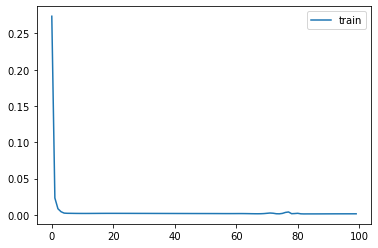

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=20, verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [36]:
#prediction for Test dataset
yhat = model.predict(test_X)

In [37]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])
#test_X

In [38]:
inv_yhat = np.concatenate((test_X, yhat), axis=1)

In [39]:
inv_yhat = scaler.inverse_transform(inv_yhat)

In [40]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X, test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)


In [41]:
y_pred = inv_yhat[:,-1]
y_pred = np.delete(y_pred,-1)
y_test = inv_y[:,-1]
y_test = np.delete(y_test,-1)

In [42]:
act = [i[-1] for i in inv_y] # last element is the predicted average energy
pred = [i[-1] for i in inv_yhat] # last element is the actual average energy

In [43]:
# calculate RMSE (Root Mean Squared Error)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.456


In [44]:
# calculating Root Mean Squared Percentage using normalization
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))*100
rmspe

3.934586077021813

In [45]:
predicted_lstm = pd.DataFrame({'predicted':pred,'avg_energy':act})
predicted_lstm = predicted_lstm[:-1]
predicted_lstm

,predicted,avg_energy
0,11.721931,11.571775
1,11.585264,11.299737
2,11.479790,11.490815
3,11.644424,11.589262
4,11.535253,11.826710
5,11.698884,12.944640
6,12.470915,11.960808
7,12.216061,11.539022
8,11.954672,12.002336
9,12.119066,11.886982


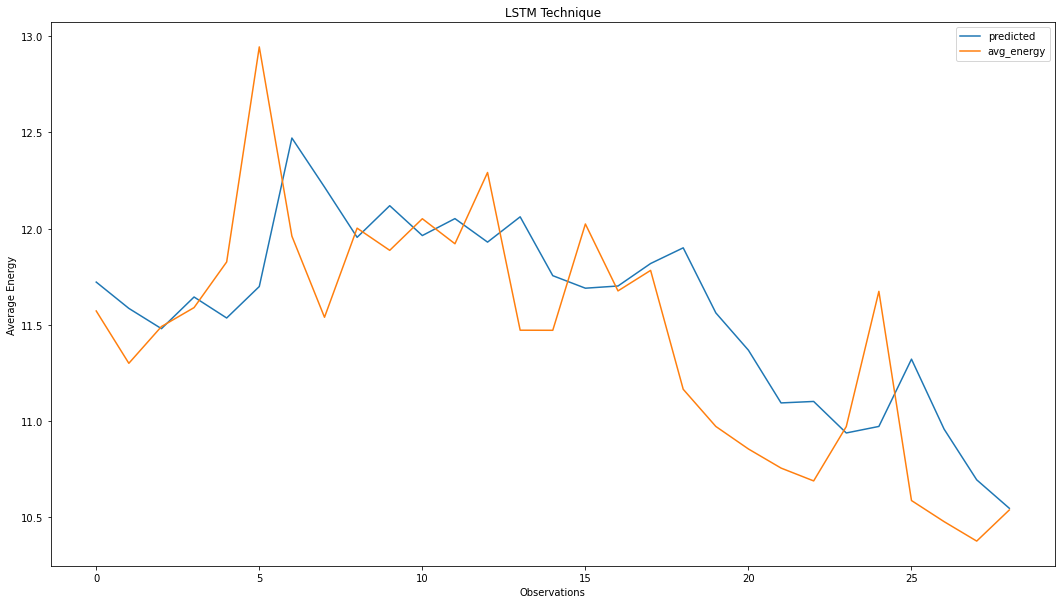

In [46]:
predicted_lstm.plot(figsize=(18,10))
plt.title('LSTM Technique')
plt.xlabel('Observations')
plt.ylabel('Average Energy')
plt.savefig('LSTM_graph')
plt.show()